In [50]:
import math
import matplotlib
from matplotlib.ticker import FixedLocator, LogFormatter
from core.util import matplotlib_setting, read_row, std_tri, std_rect, read_column, lin_regression, format_with_error, intersect_parabula
from core.fit import fit_poly, fit_exp, fit_expquad_dif_evol
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

matplotlib_setting()
file_path = "./../data/vak.xlsx"
df = pd.read_excel(file_path, 'calibrate', header=None)
current = read_column(df, 3)
pressure = read_column(df, 0)


press_time_err = read_column(df, 11)
curr_time_err = read_column(df, 12)

press_dev_err = np.zeros(75)
press_dev_err[:15] = pressure[:15]*0.2 + 0.002
press_dev_err[15:] = pressure[15:]*0.08

curr_dev_err = current*0.013 + 0.02
curr_err = std_rect(0.01)

press_dig_err = np.zeros(75)
press_dig_err[:10] = std_rect(0.001)
press_dig_err[10:23] = std_rect(0.01)
press_dig_err[23:] = std_rect(0.1)

press_err_comb = np.sqrt(press_time_err**2 + press_dig_err**2 + press_dev_err)
curr_err_comb = np.sqrt(curr_err**2 + curr_time_err**2 + curr_dev_err**2)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.013,mbar,NaN,6.3,mA,NaN,NaN,Δt,NaN,kI,kP,0.000000,0.000000
1,0.015,NaN,NaN,7.2,NaN,0.9,0.002,5.16,2.580,0.348837,0.000775,0.000388,0.069767
2,0.019,NaN,NaN,7.6,NaN,0.4,0.004,2.48,1.240,0.322581,0.003226,0.001613,0.064516
3,0.022,NaN,NaN,8.1,NaN,0.5,0.003,3.31,1.655,0.302115,0.001813,0.000906,0.060423
4,0.025,NaN,NaN,8.5,NaN,0.4,0.003,1.93,0.965,0.414508,0.003109,0.001554,0.082902


[0.10194088 0.13334463 0.13521873 0.13913791 0.15463263 0.368202
 0.8970518  0.32925902 0.33804264 0.31786687 0.31141387 0.34895068
 0.39881889 0.40017602 0.44913548 0.44476379 0.4537956  0.46623226
 0.51018884 0.53397206 0.73802867 0.52081398 0.7034167  0.60857041
 0.64959535 0.65127544 0.65007111 0.61450242 0.77852655 0.67662408
 0.75653834 0.70726565 0.74542769 0.75011945 0.78657849 0.76452183
 0.79073048 0.80071067 0.78623709 0.79777498 0.80465083 0.81245669
 0.84069667 0.85415147 0.85697108 0.87544566 0.89638631 0.90310232
 0.90107418 0.90285475 0.91820205 0.93394626 0.93897927 0.93388977
 0.9483413  0.96657887 0.96635571 0.97638351 0.99031493 1.00673452
 1.02539325 1.03485721 1.0517854  1.06590019 1.08258683 1.10074958
 1.10781048 1.11641354 1.12394156 1.12765884 1.13282646 1.14723259
 1.15777228 1.17451173 1.17570403] [ 0.06782391  0.07071233  0.07617536  0.08000565  0.08368094  0.08956748
  0.09987621  0.11157015  0.12506416  0.14049374  0.15565763  0.1735723
  0.19563969  0.22

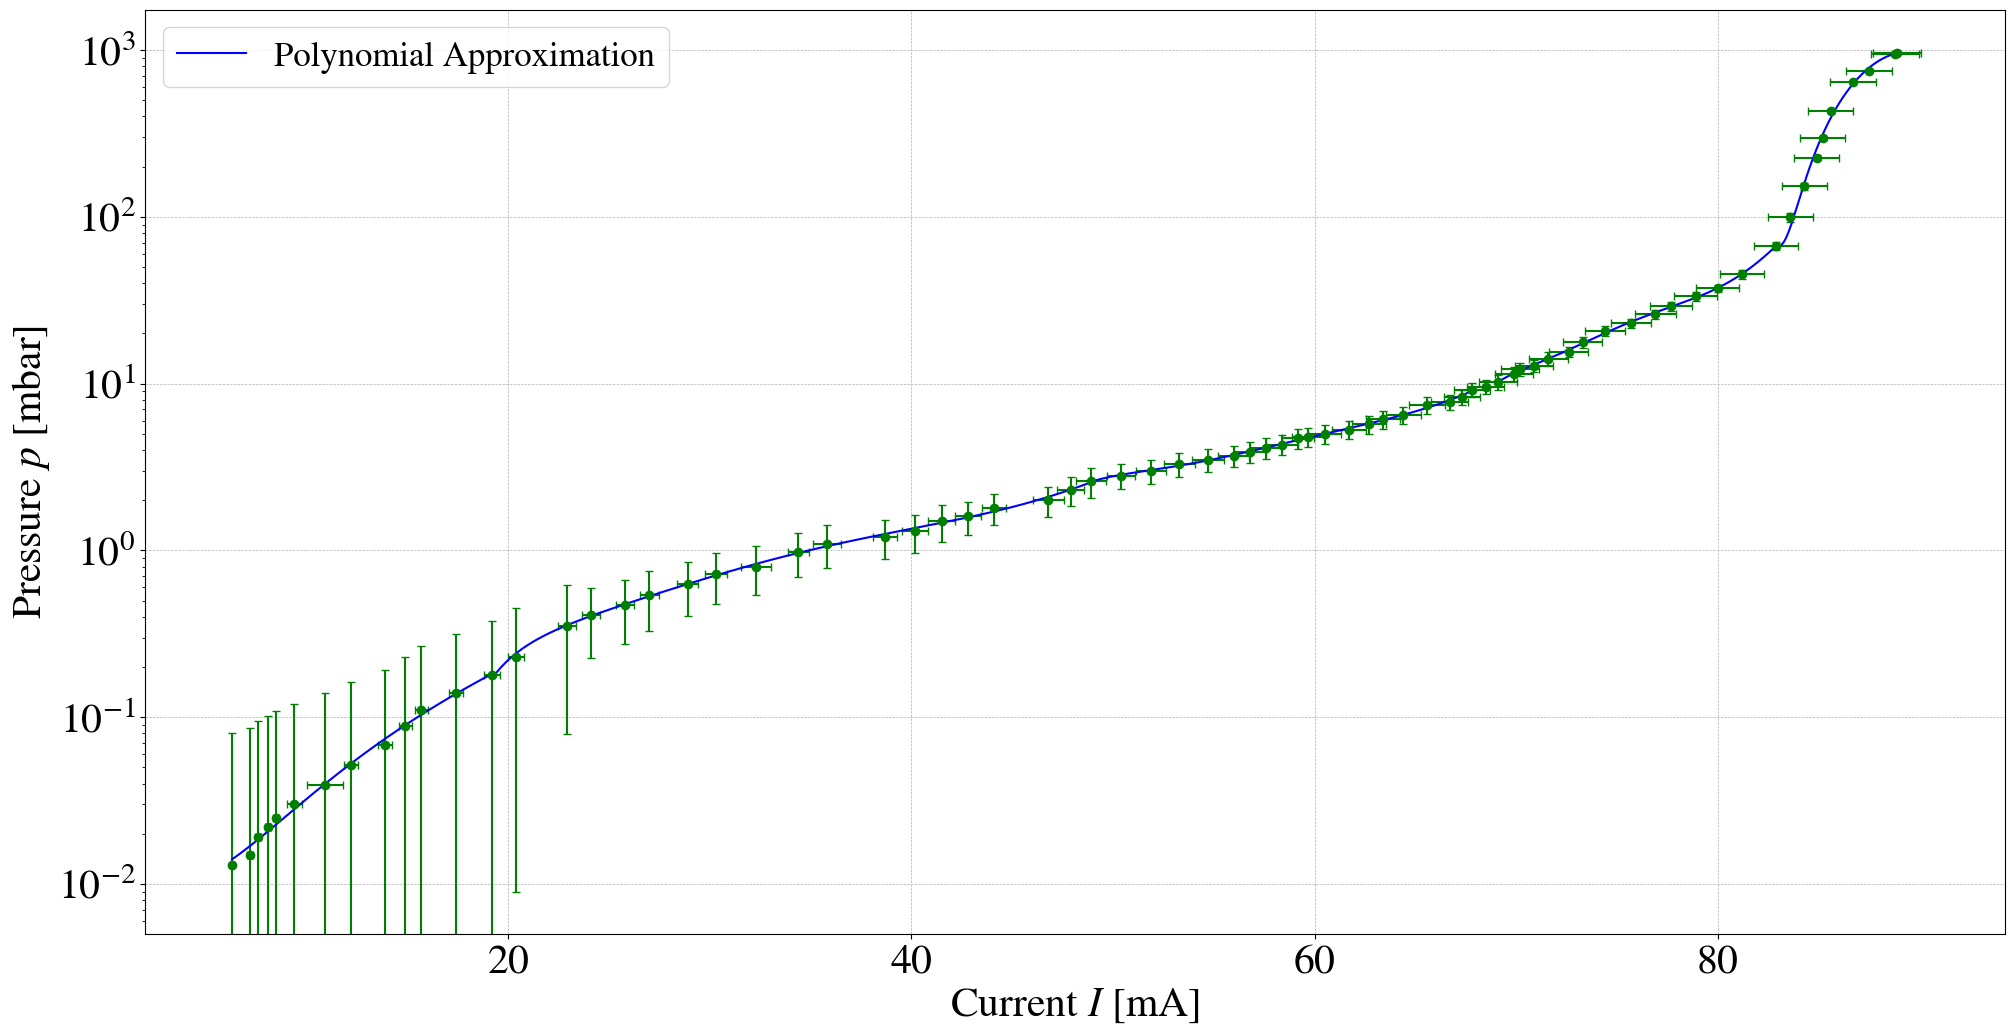

In [51]:
#i_fit = fit_poly(resArr, iArr, 3)

poly12 = fit_poly(current[0:13], pressure[0:13], 3)
poly30 = fit_poly(current[12:31], pressure[12:31], 5)
poly50 = fit_poly(current[30:50], pressure[30:50], 5)
poly60 = fit_poly(current[51:66], pressure[51:66], 5)
exp74 = fit_poly(current[65:], pressure[65:], 3)


#plt.xscale('log')
plt.yscale('log')
plt.errorbar(
    current, pressure,
    xerr=curr_err_comb, yerr=press_err_comb,
    fmt='go', capsize=3
)
plt.xlabel(r"Current $I\ \mathrm{[mA]}$")
plt.ylabel(r"Pressure $p\ \mathrm{[mbar]}$")

print(curr_err_comb, press_err_comb)
#x_ticks = np.arange(10, 121, 10)  # 10, 20, 30 ... 120
#plt.xlim(10, 120)
#plt.xticks(x_ticks, labels=x_ticks)  # force tick labels
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.plot(poly12.x_fit, poly12.y_fit, color="blue")
plt.plot(poly30.x_fit, poly30.y_fit, color="blue")
plt.plot(poly50.x_fit, poly50.y_fit, color="blue")
plt.plot(poly60.x_fit, poly60.y_fit, color="blue")
plt.plot(exp74.x_fit, exp74.y_fit, color="blue", label="Polynomial Approximation")

#plt.title(label="Extrapolation der Regressionsgerade")

plt.legend(prop={'size': 25})
plt.savefig('figures/calibration.pdf')
plt.show()

[0.10194088 0.13334463 0.13521873 0.13913791 0.15463263 0.368202
 0.8970518  0.32925902 0.33804264 0.31786687 0.31141387 0.34895068
 0.39881889 0.40017602 0.44913548 0.44476379 0.4537956  0.46623226
 0.51018884 0.53397206 0.73802867 0.52081398 0.7034167  0.60857041
 0.64959535 0.65127544 0.65007111 0.61450242 0.77852655 0.67662408
 0.75653834 0.70726565 0.74542769 0.75011945 0.78657849 0.76452183
 0.79073048 0.80071067 0.78623709 0.79777498 0.80465083 0.81245669
 0.84069667 0.85415147 0.85697108 0.87544566 0.89638631 0.90310232
 0.90107418 0.90285475 0.91820205 0.93394626 0.93897927 0.93388977
 0.9483413  0.96657887 0.96635571 0.97638351 0.99031493 1.00673452
 1.02539325 1.03485721 1.0517854  1.06590019 1.08258683 1.10074958
 1.10781048 1.11641354 1.12394156 1.12765884 1.13282646 1.14723259
 1.15777228 1.17451173 1.17570403] [ 0.06782391  0.07071233  0.07617536  0.08000565  0.08368094  0.08956748
  0.09987621  0.11157015  0.12506416  0.14049374  0.15565763  0.1735723
  0.19563969  0.22

/var/folders/y4/8b_9bd3j179gbmftvg2wpkg00000gn/T/ipykernel_7957/1465648098.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(prop={'size': 25})


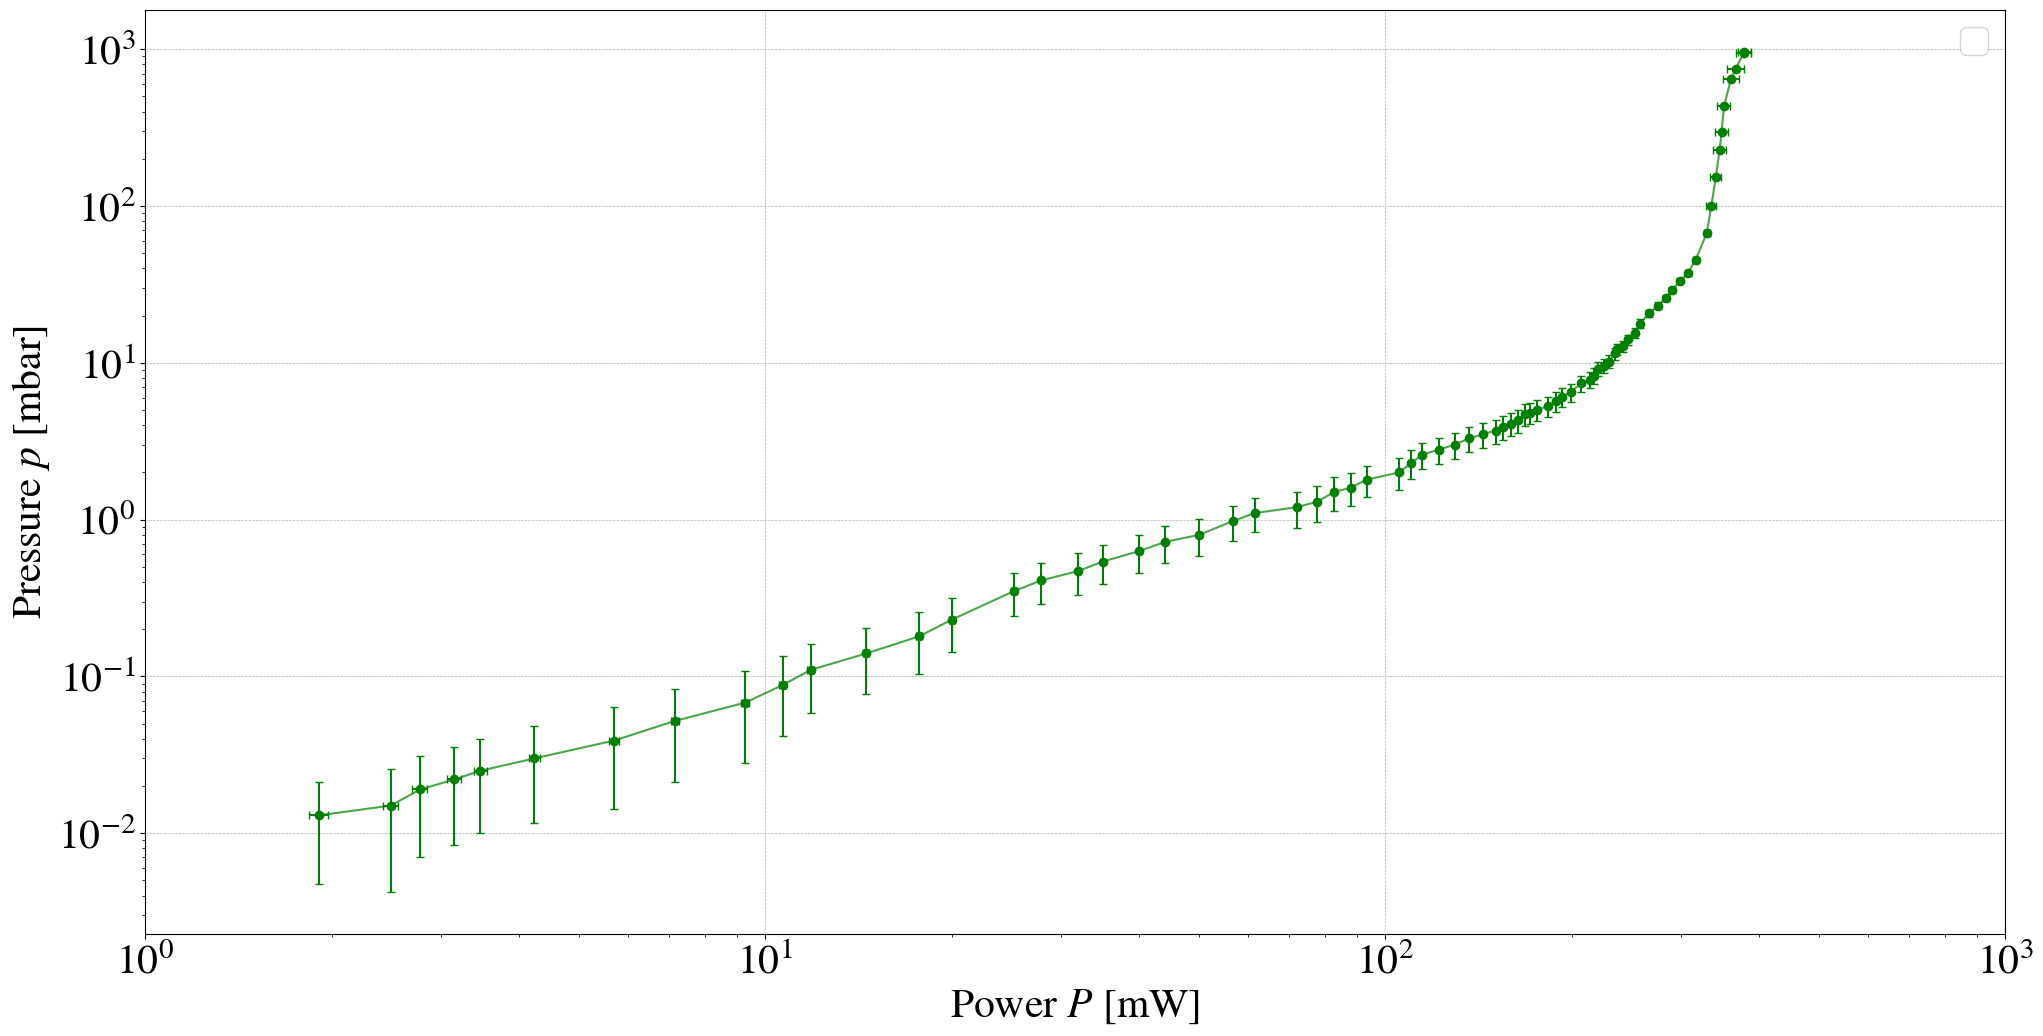

In [52]:
res = 48
res_err = 0.2

power = (res*(current/1000)**2)*1000
power_err = np.sqrt((0.2*(current/1000)**2*1000)**2 + ((2*res*(current/1000)**2*0.2)*1000*curr_err)**2)
plt.xscale('log')
plt.yscale('log')
plt.errorbar(
    power, pressure,
    xerr=press_err_comb, yerr=power_err,
    fmt='go', capsize=3,
)
plt.plot(power, pressure, 'g-', alpha=0.7)
plt.xlabel(r"Power $P\ \mathrm{[mW]}$")
plt.ylabel(r"Pressure $p\ \mathrm{[mbar]}$")

print(curr_err_comb, press_err_comb)
#x_ticks = np.arange(10, 121, 10)  # 10, 20, 30 ... 120
plt.xlim(1, 1000)
#plt.xticks(x_ticks, labels=x_ticks)  # force tick labels
plt.grid(True, which='major', linestyle='--', linewidth=0.5)

#plt.title(label="Extrapolation der Regressionsgerade")

plt.legend(prop={'size': 25})
plt.savefig('figures/power.pdf')
plt.show()
